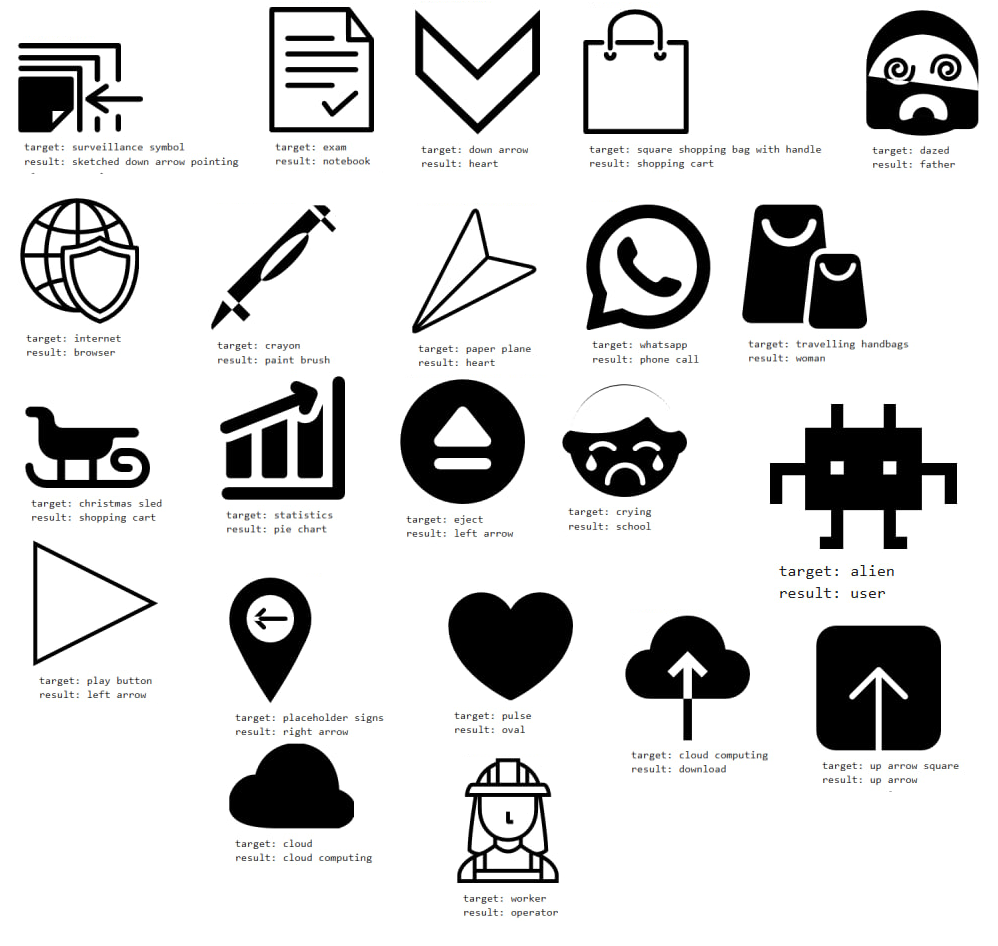

# SVG Text Description Sample

In [1]:
import os
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from nltk.tokenize import WordPunctTokenizer
from subword_nmt.apply_bpe import BPE

from model import *
import svg_converter as converter

C:\Users\Ганга Сэм\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device.type

'cuda'

### Data

In [3]:
def tokenize(x):
    return ' '.join(tokenizer.tokenize(x.lower()))

def get_svg_paths(folders):
    svg_paths = []

    for i, folder in enumerate(folders):
        files = [file for file in os.listdir(folder)]

        for file in files:
            svg_name = file[:-4] # del ".svg"
            svg_name = svg_name.strip()
                
            svg_name = tokenize(svg_name)
            svg_name = filenames_bpe.process_line(svg_name)

            svg_path = os.path.join(folder, file)

            svg_paths.append([svg_name, svg_path])

    return svg_paths

In [4]:
dataset_path = 'dataset2k'
tokenizer = WordPunctTokenizer()

In [5]:
filenames_bpe = BPE(open('tmp_bpe_rules.fnt'))

In [6]:
folders = os.listdir(dataset_path)
folders = [os.path.join(dataset_path, foldername)
           for foldername in folders
           if os.path.isdir(os.path.join(dataset_path, foldername))]

print(len(folders))

svg_paths = np.array(get_svg_paths(folders))

2000


In [7]:
len(svg_paths), svg_paths[:5]

(134501,
 array([['1 pa@@ ss@@ wor@@ d', 'dataset2k\\1\\1 password.svg'],
        ['1 p@@ et@@ e', 'dataset2k\\1\\1 pete.svg'],
        ['1 star', 'dataset2k\\1\\1 star.svg'],
        ['a@@ do@@ be in@@ design 1',
         'dataset2k\\1\\adobe indesign 1.svg'],
        ['ba@@ llo@@ on 1', 'dataset2k\\1\\balloon 1.svg']], dtype='<U192'))

In [8]:
batch_size = 32
seq_len = 512

c = converter.Converter(seq_len)

dataset = SvgDataset(svg_paths, seq_len=seq_len, device=device)

dl = DataLoader(dataset, batch_size=batch_size, shuffle = True)

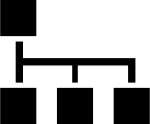

four squares graphic


In [9]:
for vec, tgt in dl:
    show(c, vec[0])
    print(tgt[0])
    break

### Eval

In [10]:
model = STTModel(
    vocab_size=1070,
    dim=64,
    seq_len=seq_len,
    n_heads=8,
    n_encoder_layers=2,
    n_decoder_layers=3,
    dropout_p=0.1
).to(device)

opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [11]:
save_path = "checkpoints"

load_checkpoint(model, opt, save_path, 'epoch', '166500', device)

(166501, {'train_loss': [], 'test_loss': []})

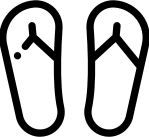

target: flip flip flops
result: smartphone with locked padlock


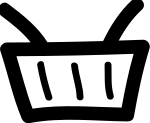

target: basket doodle
result: thumb up


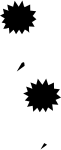

target: right anger bubble
result: test tube with lexages


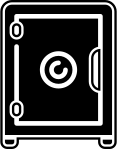

target: savings bank
result: painting with water


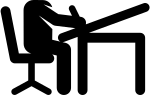

target: drawing student
result: heart with a keyhole in a circle


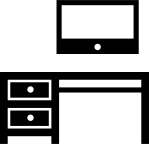

target: studio desk with two drawers and a computer monitor on it
result: two balloon


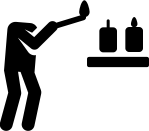

target: candles humanpictos
result: pay point of service


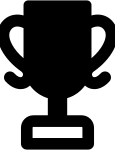

target: sports cup
result: award medal with a ribbon


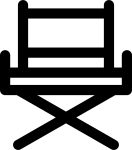

target: director chair
result: vintage royal crown design


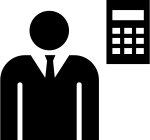

target: certified accountant business
result: online shop online shop


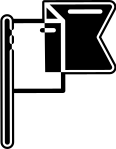

target: maps and flags flag pole
result: inclined dropper


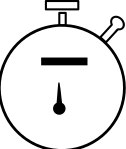

target: sportive chronometer
result: dinner food and restaurant


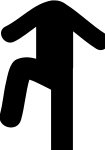

target: person exercise heating
result: bowl of liquid inside a circle


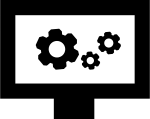

target: computer settings interface symbol of a monitor screen with gears
result: turned off


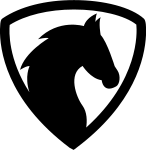

target: black horse head in a shield
result: phone tool variant


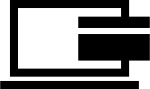

target: credit card on laptop
result: hand point left solid


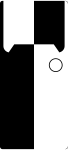

target: gaming pc
result: oval speech bubble with three dots inside


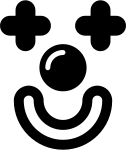

target: face of smiling clown
result: royal crown variant with a cross


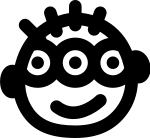

target: alien space
result: mountains road with a heart


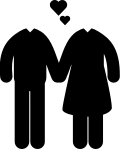

target: couple of male persons in love
result: royal crown with a cross inside


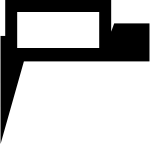

target: folder with papers
result: exclamation sign in a square button


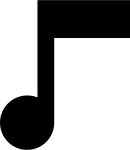

target: music note symbol
result: square black flag


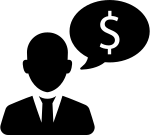

target: business man talking about cash dollars
result: picture and apple


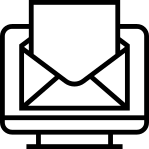

target: email postcard
result: heart shaped shield


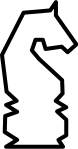

target: horse of chess game black shape from side view
result: ruler tools and utensils


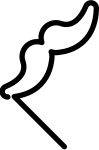

target: moustache beauty
result: phone back connected to a laptop


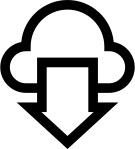

target: cloud download ui
result: drum thin outline


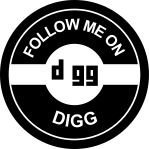

target: follow me on digg social badge
result: smartphone picture


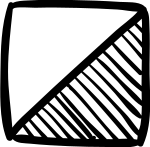

target: square sketch of two triangles
result: christmas tree with a branch with leaves


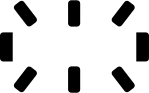

target: camera white balance fluorescent light
result: heart with wings


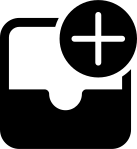

target: mail inbox add
result: heart shape


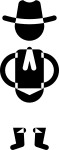

target: country movement
result: business card with about dollar sign


In [12]:
sample(c, model, dl, device=device, p_value=0.4)

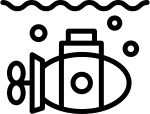

Predictions:

rocket
microphone
tap
pint of beer beer beer beer beer beer
coffee cup
coffee cup
christmas tree
man with tie
money
owl
emergency
owl
gift
medal
user
christmas tree
man
light bulb
airplane
bell
acoustic guitar
afro
medal
aquarium
gift
headphones
settings
medal
pint of beer beer beer beer beer beer
medal
sun
hair brush


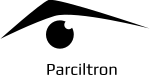

Predictions:

camcorder
beer
industrial robot
aqualung
satellite dish
money
industrial robot
sand castle
school
coffee cup
medal medal
coffee cup
bench
trophy
test tube
backpack
schedule
trophy
house
desk
truck
medal medal
ice cream
test tube
rake
truck
camcorder
bench
truck
chinese temple
medal medal
desk


In [58]:
paths = [
    "dataset2k/submarine/submarine.svg",
    "/home/grafstor/Documents/Design/parcilrtion.svg",
]
for path in paths:
    n = 32

    _, vector = c.to_vector(c.open(path), is_one_len=True)
    show(c, vector)

    results = predict(model,
            torch.tensor([vector]*n),
            device=device,
            p_value=0.25,
            max_length=15)

    print('Predictions:\n')

    for result in results:
        print(decode_bpe(result))

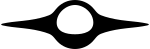

Predictions:

user
user
user
user
user
user
cloud computing
cloud computing
cloud computing
user
user
cloud computing
user
cloud computing
cloud computing
user
user
user
cloud computing
cloud computing
user
cloud computing
user
user
user
cloud computing
user
user
cloud computing
user
user
user


In [62]:
path = "/home/grafstor/Documents/Design/Group 7.svg"
n = 32

_, vector = c.to_vector(c.open(path), is_one_len=True)
show(c, vector)

results = predict(model,
        torch.tensor([vector]*n),
        device=device,
        p_value=0.1,
        max_length=15)

print('Predictions:\n')

for result in results:
    print(decode_bpe(result))